a = -54.379 +/- 8.276
b = 0.032 +/- 0.004
c = -6.655 +/- 0.085
e = 0.882 +/- 0.013


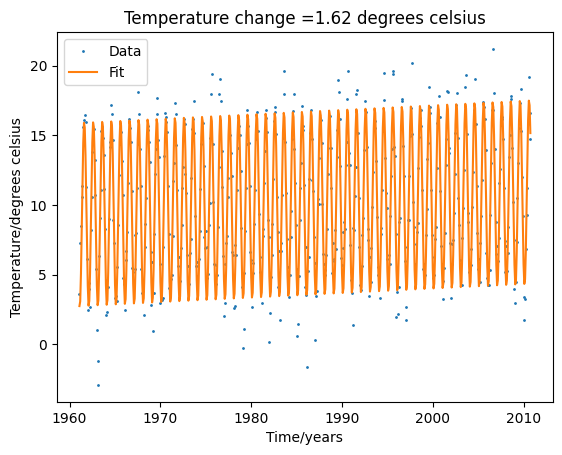

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.genfromtxt('cambridge.dat',skip_header=4)

year = data[:,0]


month = data[:,1]
time = year+((month)/12)
tmax = data[:,2]
tmin = data[:,3]
taver = (tmax+tmin)/2


def func(x, a,b,c,d):
  time_made = a+b*(x)+c*np.sin(2*np.pi*x+d)
  return time_made

popt,pcov = curve_fit(func,time,taver)
perr = np.sqrt(np.diag(pcov))


b = popt[1]
temp_change = round(b*50,2)

print('a =', round(popt[0],3), '+/-', round(perr[0],3))
print('b =', round(popt[1],3), '+/-', round(perr[1],3))
print('c =', round(popt[2],3), '+/-', round(perr[2],3))
print('e =', round(popt[3],3), '+/-', round(perr[3],3))



plt.plot(time, taver, 'o',label='Data', ms=1)
plt.plot(time,func(time,*popt),'-',label='Fit')
plt.xlabel('Time/years')
plt.ylabel('Temperature/degrees celsius')
output = 'Temperature change ='+str(temp_change)+' degrees celsius'
plt.title(output)

plt.legend()
plt.savefig('TemperaturechangeinCambridge.png', dpi=300)
plt.show()





